In [1]:
# global var set
import transformers

# model info, change as needed
model_checkpoint = "roberta-base"
batch_size = 16
num_epochs = 16

fileTag = "clean-v1"

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [2]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [3]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//5], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5:trainDatasetOriginal.shape[0]//5*2], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*2], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*2:trainDatasetOriginal.shape[0]//5*3], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*3:]])]), 
                                  'selection3': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*3], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*3:trainDatasetOriginal.shape[0]//5*4], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*4:]])]),
                                  'selection4': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*4], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*4:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//5 else (1 if x < trainDatasetOriginal.shape[0]//5*2 
                                                                                               else (2 if x < trainDatasetOriginal.shape[0]//5*3 
                                                                                               else (3 if x < trainDatasetOriginal.shape[0]//5*4
                                                                                               else  4))) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//5], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5:testDatasetOriginal.shape[0]//5*2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*2], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*2:testDatasetOriginal.shape[0]//5*3], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*3:]])]), 
                                  'selection3': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*3], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*3:testDatasetOriginal.shape[0]//5*4], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*4:]])]),
                                  'selection4': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*4], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*4:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//5 else (1 if x < testDatasetOriginal.shape[0]//5*2 
                                                                                               else (2 if x < testDatasetOriginal.shape[0]//5*3 
                                                                                               else (3 if x < testDatasetOriginal.shape[0]//5*4
                                                                                               else  4))) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)


In [4]:
trainDatasetProcessed.to_csv(f'./dataset/5Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,selection4,label
0,"['curious', 'welcoming', 'happy', 'lucky', 'tr...","{'joy': 2, 'trust': 3, 'fear': 0, 'surprise': ...",James rushed to finish his PowerPoint.,Breanna wants to lose some weight.,George was walking past a row of parked bikes.,He had to move away.,Once he got there the beekeeper asked if Mark ...,4
1,"['frightened', 'apprehensive', 'nervous']","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",She always gossiped about other people and sai...,My boyfriend took me to Amsterdam one year.,Dale is at his favorite bar having drinks,The trail took them through dark woods.,He decided to get it done at a charity instead...,3
2,"['fulfilled', 'tired', 'happy']","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ...",The farmer woke up early everyday.,She had everyone dressed including herself.,He did this until he was 80 years old.,She decided to throw a big party.,Beth was angry that Sam didn't clean up after ...,0
3,"['anticipation', 'hungry', 'happy']","{'joy': 3, 'trust': 1, 'fear': 0, 'surprise': ...",She would tell everyone that Alice lived in ca...,He can't because of his contract.,He looked inside and saw the Home Ec class had...,He found many of them and hung them on his shi...,I was so angry that I told her never to call m...,2
4,"['sentimental', 'intrigued', 'reflective']","{'joy': 1, 'trust': 0, 'fear': 0, 'surprise': ...",Ronald had a bag that meant a lot to him.,Henry was walking while holding Stacy.,Judy went to her grandmother's on Saturday mor...,Jack and Diane tried to follow it but they wer...,She was annoying him all night long.,0
...,...,...,...,...,...,...,...,...
11605,"['devious', 'happy', 'relaxed', 'grateful', 'c...","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ...",Corry moved into a new apartment.,Andy smelled the milk and noticed it was spoiled.,Michael was having a daughter.,She paid for her drink and started sipping it.,He let her pick the music.,4
11606,"['anticipation', 'centered']","{'joy': 2, 'trust': 2, 'fear': 2, 'surprise': ...","When I went to do another one, I hurt my ankle.",Sue decided to delete the story and try again.,Then a thaw came overnight!,The first night I tried it I slept like a baby!,He pulled the strings of his backpack and rele...,4
11607,"['sad', 'uncomfortable']","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",All his roommates loved the smell.,Alice really needed to go to the bathroom.,They served all their guests delicious food in...,But he didn't become as good as he wanted to.,I decided to call in a professional to finish ...,1
11608,"['valued', 'happy', 'satisfied', 'helpful', 'c...","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ...",Together they spent three hours in the garden ...,Judy was in a baking contest.,He needed his own money for things like gas an...,He saw the wet spot on the floor.,The kids were hungry after school.,0


In [5]:
testDatasetProcessed.to_csv(f'./dataset/5Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,selection4,label
0,"['honest', 'happy', 'proud']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ...","Since school is starting soon, I want to give ...","I wasn't allowed to have toys, so I played wit...",Mark was an honest soccer player who played by...,John desperately needed some money to pay bills.,It was good food and it was cheap.,2
1,"['surprised', 'worried', 'puzzled', 'nervous',...","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",Amber loved spicy food.,He sees his wife and gives her the biggest hug!,"Rick sat down at his computer, about to do work.",I enjoyed swimming in the beach water during t...,He looked online to see what happened.,4
2,"['happy', 'nervous', 'elated', 'small', 'peace...","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ...","We texted her our congratulations, as this wil...",She pulled out the kitchen stool and took a step.,He came out with so many great inventions.,He left the child unsupervised.,He was hoping this year to be tall enough for ...,0
3,"['annoyed', 'surprised', 'sad']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...","Since my siblings were broke, my mom asked me ...",When she removed it the usb portion was broken.,They were having a ten dollar all you can eat ...,Alma called her boyfriend to stay with her.,The prankster who had hacked the sign enjoyed ...,1
4,"['irritated', 'weak', 'sad']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",They turned into chard.,They won third prize for best homemade float.,I was very thirsty.,He listened to it.,"When she told John her feelings, John mirrored...",2
...,...,...,...,...,...,...,...,...
11124,"['depressed', 'disillusioned', 'disappointment']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Roland noticed that his hair had gotten very l...,It looks and taste no different than any other...,She told me she was hungry.,She followed the recipe.,In time his circulation and respiratory health...,1
11125,"['excitement', 'excited', 'fun', 'puzzled', 'a...","{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': ...",Jamie got so carried away he forgot the pies w...,She was then sued in court and had to pay some...,Amanda was thrilled to finally be a big sister.,The judge asked him about his sweat.,Adam thought it was fascinating.,0
11126,"['happy', 'content', 'glad', 'excited', 'eager...","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",The teacher heard the phone ring.,He was always picked for the first team.,He was driving much too fast for the road cond...,Oliver liked learning card tricks.,The kids were starving.,3
11127,"['surprised', 'awe', 'surprise', 'horrified', ...","{'joy': 1, 'trust': 0, 'fear': 0, 'surprise': ...",Hannah decided to delete most of them.,They just told me it was soup.,A rabbit had started nesting on top of his bat...,He was very nervous that he wouldn't know anyo...,One day an older lady came in and told him how...,2


# load dataset

In [6]:
from datasets import load_dataset, load_metric

In [7]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/5Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/5Select-{fileTag}-test.csv'})

Using custom data configuration default-16041a9da5e70933


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-16041a9da5e70933\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'selection4', 'label'],
        num_rows: 11610
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'selection4', 'label'],
        num_rows: 11129
    })
})

In [9]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['honest', 'happy', 'proud']",
 'plutchik': "{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': 0, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 0}",
 'selection0': 'Since school is starting soon, I want to give her time to adjust.',
 'selection1': "I wasn't allowed to have toys, so I played with my brother's.",
 'selection2': 'Mark was an honest soccer player who played by the rules.',
 'selection3': 'John desperately needed some money to pay bills.',
 'selection4': 'It was good food and it was cheap.',
 'label': 2}

In [10]:
def show_one(example):
    print(f"Context: {example['plutchik']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"  D - {example['selection3']}")
    print(f"  E - {example['selection4']}")
    print(f"\nGround truth: option {['A', 'B', 'C', 'D', 'E'][example['label']]}")

In [11]:
show_one(dataset["train"][0])

Context: {'joy': 2, 'trust': 3, 'fear': 0, 'surprise': 0, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 2}
  A - James rushed to finish his PowerPoint.
  B - Breanna wants to lose some weight.
  C - George was walking past a row of parked bikes.
  D - He had to move away.
  E - Once he got there the beekeeper asked if Mark would like a tour.

Ground truth: option E


# Preprocessing Data

In [12]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [15]:
import re
selectionList = ["selection0", "selection1", "selection2", "selection3", "selection4"]
weightRemap = ["NOT ", "LITTLE ", "", "VERY ", "ABSOLUTELY "]
def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*2 for context in examples["emotion"] ]
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\"', '')) ]*2 for context in examples["plutchik"] ]
    first_sentences = [["The following sentences contain emotions: {}".format(", ".join([weightRemap[int(eachCaseWeight.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", ""))] 
                                                        + eachCaseEmotionType.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", "").strip()
                        for eachCaseWeight, eachCaseEmotionType in 
                        zip([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]][eventIndex], 
                           [re.split(':|,',eachEmotionCombination)[::2] for eachEmotionCombination in examples["plutchik"]][eventIndex])]))]*5 for eventIndex in 
                           range(len([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]]))]
    
    # first_sentences = [["The following sentences contain emotions: {}".format(', '.join([(weightRemap[eachEmotion[1]] + " " +eachEmotion[0]).strip() 
    #                    for eachEmotion in ast.literal_eval(context).items()]))]*2 
    #                    for context in examples["plutchik"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList]for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+5] for i in range(0, len(v), 5)] for k, v in tokenized_examples.items()}

In [16]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 5 [38, 39, 41, 37, 46]


In [17]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(4) ]

['<s>The following sentences contain emotions: joy, VERY trust, NOT fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>James rushed to finish his PowerPoint.</s>',
 '<s>The following sentences contain emotions: joy, VERY trust, NOT fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>Breanna wants to lose some weight.</s>',
 '<s>The following sentences contain emotions: joy, VERY trust, NOT fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>George was walking past a row of parked bikes.</s>',
 '<s>The following sentences contain emotions: joy, VERY trust, NOT fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>He had to move away.</s>',
 '<s>The following sentences contain emotions: NOT joy, NOT trust, fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>She always gossiped about other people and said ugly things.</s>',
 '<s>The following sentences contain emotio

In [18]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/12 [00:00<?, ?ba/s]

  0%|          | 0/12 [00:00<?, ?ba/s]

In [37]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer

model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultipleChoice: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultipleChoice were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

In [38]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    learning_rate=5e-6, # for bert-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

In [39]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [40]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [43]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(4)]

['<s>The following sentences contain emotions: anticipation</s></s>George sprained his ankle going down the stairs.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: anticipation</s></s>He made a flyer asking for a strong helper.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: anticipation</s></s>He hopped off the boat into the crystal clear water.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>']

In [42]:
show_one(dataset["train"][8])

Context: ["anticipation:2"]
  A - George sprained his ankle going down the stairs.
  B - He made a flyer asking for a strong helper.
  C - He hopped off the boat into the crystal clear water.

Ground truth: option B


# Trainer Defined

In [19]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [20]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [21]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: plutchik, Unnamed: 0, selection1, emotion, selection0. If plutchik, Unnamed: 0, selection1, emotion, selection0 are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.
C:\Python\miniconda3\envs\pytorchEnvWithDataSci\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 53234
  Num Epochs = 16
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 53248


Epoch,Training Loss,Validation Loss,Accuracy
1,0.693800,0.693128,0.504018
2,0.614600,0.594435,0.656838
3,0.564700,0.571774,0.684685
4,0.526300,0.572104,0.695053
5,0.499500,0.586160,0.701162
6,0.472300,0.586649,0.705170
7,0.467500,0.620333,0.704207
8,0.444200,0.623844,0.704265
9,0.415700,0.655308,0.705055
10,0.394100,0.685141,0.703860


Saving model checkpoint to bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500
Configuration saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\config.json
Model weights saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\pytorch_model.bin
tokenizer config file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\tokenizer_config.json
Special tokens file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\special_tokens_map.json
Saving model checkpoint to bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000
Configuration saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\config.json
Model weights saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\tokenizer_config.json
Special tokens file saved in bert-base-uncased-finetuned-emotionCommonsen

TrainOutput(global_step=53248, training_loss=0.4483006133769567, metrics={'train_runtime': 8821.4262, 'train_samples_per_second': 96.554, 'train_steps_per_second': 6.036, 'total_flos': 5.267817952412011e+16, 'train_loss': 0.4483006133769567, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

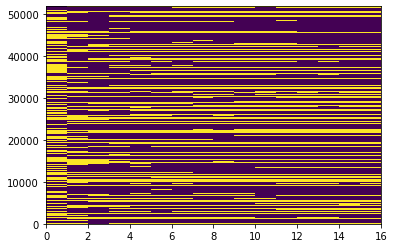

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [23]:
import pandas as pd
dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[plutchik]trainingInfo-{fileTag}.csv')

In [24]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[plutchik]evaluationSpecificInfo-{fileTag}.csv')